<a href="https://colab.research.google.com/github/sepriando/sataid-example/blob/main/sataid_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
!pip install --index-url https://test.pypi.org/simple/ sataid
!pip install netCDF4 cartopy scipy xarray rasterio
#!pip uninstall sataid

Looking in indexes: https://test.pypi.org/simple/


In [57]:
import sataid as sat

# Reading sataid data:
sat = sat.read_sataid('H09_B13_Indonesia_20240908.Z0000')

# Display description
sat.description()

=== Data Description ===
Time: 2024-09-08 00:00 UTC
Channel: IR
Dimension: 3000x2000
Resolution: 0.019999999552965164
Units: °C
Sataid Version: 1.1 
Coordinate Range:
lat : -19.980000 - 20.000000
lon : 90.000000 - 149.979996

=== Satellite Description ===
Satellite: Himawari-9
Nadir Coordinate: -0.045706, 140.761246
Altitude: 42163.75 km




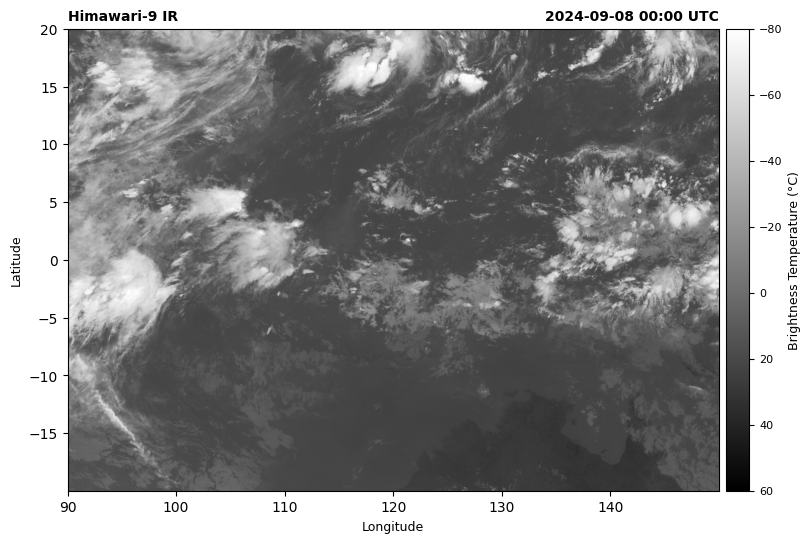

In [41]:
# Display a simple default plot
sat.plot()

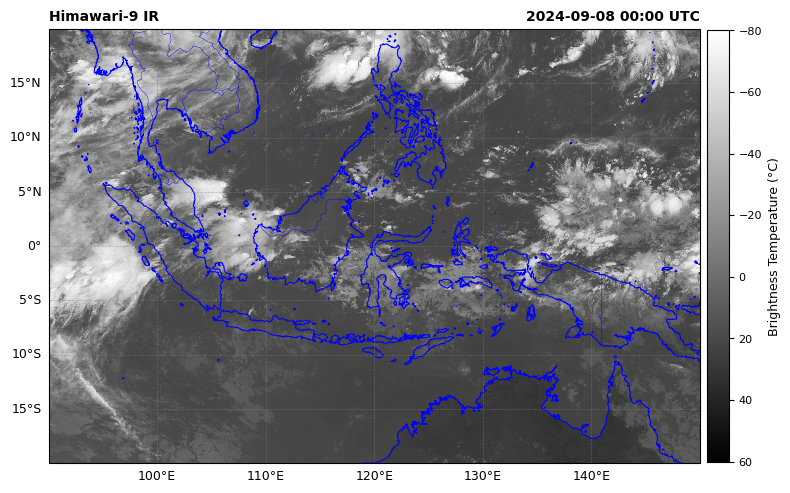

In [42]:
# Display plot with Cartopy map, supporting coastlines
sat.plot(cartopy=True) # Will use the default cmap ('gray_r')

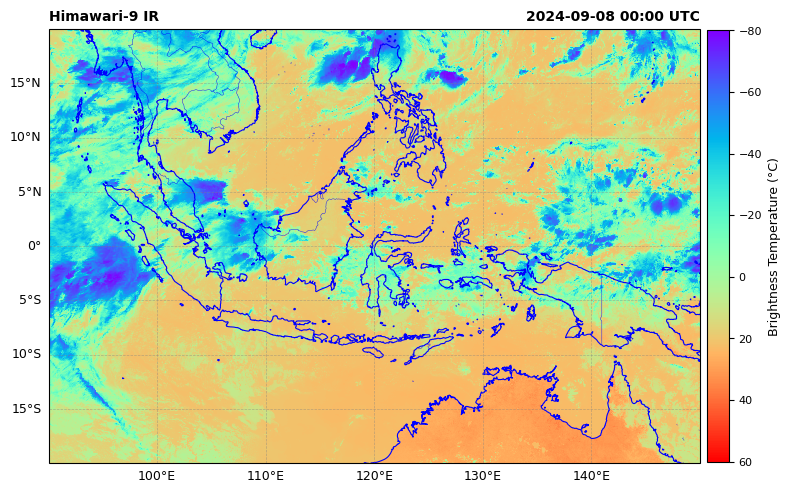

In [43]:
# Display plot with custom cmap ('rainbow')
sat.plot(cartopy=True, cmap='rainbow') # You can also try jet, terrain

In [44]:
# Save the plot to a file
print("\nSaving plot with default_name + .png")
# Construct the full path to save the file within the mounted Google Drive
output_save_path_default = os.path.join(folder, 'H09_B13_Indonesia_20240908.Z0000.png')
sat.savefig(output_file=output_save_path_default, cartopy=True)
print(f"Plot saved to: {output_save_path_default}")

print("\nSaving plot with name 'myplot.png'")
# Construct the full path for 'myplot.png'
output_save_path_custom = os.path.join(folder, 'myplot.png')
sat.savefig(cartopy=True, output_file=output_save_path_custom, cmap='rainbow')
print(f"Plot saved to: {output_save_path_custom}")


Saving plot with default name + .png
Menyimpan plot ke: /content/drive/MyDrive/mypackage/sataid/H09_B13_Indonesia_20240908.Z0000.png
Plot saved to: /content/drive/MyDrive/mypackage/sataid/H09_B13_Indonesia_20240908.Z0000.png

Saving plot with name 'myplot.png'
Menyimpan plot ke: /content/drive/MyDrive/mypackage/sataid/myplot.png
Plot saved to: /content/drive/MyDrive/mypackage/sataid/myplot.png


In [45]:
# Extract value at a specific point, e.g., -10.17, 108.021
point_lat, point_lon = -10.17, 108.021

# 'nearest' method (default)
val_nearest = sat.sel(latitude=point_lat, longitude=point_lon)
print(f"Value (nearest) at ({point_lat}, {point_lon}) is: {val_nearest:.2f} {sat.units}")

# 'linear' method (requires scipy)
val_linear = sat.sel(latitude=point_lat, longitude=point_lon, method='linear')
print(f"Value (linear) at ({point_lat}, {point_lon}) is: {val_linear:.2f} {sat.units}")

Value (nearest) at (-10.17, 108.021) is: 16.17 °C
Value (linear) at (-10.17, 108.021) is: 16.11 °C



Subsetting data for the Kalimantan region...
=== Data Description ===
Time: 2024-09-08 00:00 UTC
Channel: IR
Dimension: 600x600
Resolution: 0.019999999552965164
Units: °C
Sataid Version: 1.1 
Coordinate Range:
lat : -4.500000 - 7.480000
lon : 108.019999 - 119.999998

=== Satellite Description ===
Satellite: Himawari-9
Nadir Coordinate: -0.045706, 140.761246
Altitude: 42163.75 km




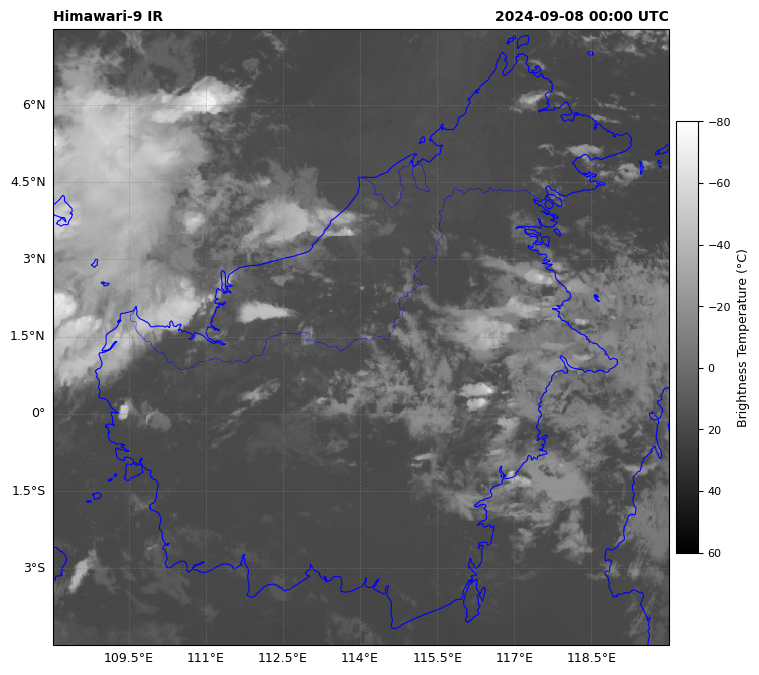

Menyimpan plot ke: kalimantan_box.png


In [50]:
# Subset the data for a specific region and save it
print("\nSubsetting data for the Kalimantan region...")

# Use slice to define the latitude and longitude range
# Adjust slice for Kalimantan (approximate coordinates)
kalimantan_box = sat.sel(latitude=slice(7.5, -4.5), longitude=slice(108, 120))
kalimantan_box.description()

# Plot the subsetted area
kalimantan_box.plot(cartopy=True)

# Save the plot of the subsetted data
kalimantan_box.savefig(output_file='kalimantan_box.png',cartopy=True)

In [51]:
# Convert to netCDF format
sat.to_netcdf()

Menyimpan data ke: H09_B13_Indonesia_20240908.Z0000.nc


In [52]:
# Convert to GeoTiff format
sat.to_geotiff('Satellite.tif')

Menyimpan data ke: Satellite.tif


In [53]:
# Convert to xarray and use its features
print("\nConverting to xarray.DataArray...")
xr_data = sat.to_xarray()
xr_data


Converting to xarray.DataArray...


<xarray.DataArray 'IR' (lat: 2000, lon: 3000)> Size: 48MB
array([[-0.43555298,  5.96099243,  5.96099243, ..., 11.97054443,
        11.79992065, 11.08571777],
       [ 3.47545776,  3.47545776, 10.56820068, ..., 13.29692993,
        12.6218811 , 10.71224365],
       [ 1.27092896,  8.76397095, 12.67830811, ..., 10.36620483,
        11.54342041, 10.79854736],
       ...,
       [15.97942505, 13.7444397 , 13.7444397 , ...,  9.26210938,
         9.37893066, 11.05706177],
       [16.38793335, 15.32241211, 14.35643921, ...,  9.2036377 ,
         9.34972534, 10.56820068],
       [15.78823242, 15.78823242, 14.79918823, ...,  9.08660278,
         9.49559937, 11.60048828]])
Coordinates:
  * lat      (lat) float64 16kB -19.98 -19.96 -19.94 -19.92 ... 19.96 19.98 20.0
  * lon      (lon) float64 24kB 90.0 90.02 90.04 90.06 ... 149.9 150.0 150.0
Attributes:
    satellite:  Himawari-9
    channel:    IR
    units:      °C
    long_name:  Data from Sataid channel IR


Accessing data values at a specific point:
<xarray.DataArray 'IR' ()> Size: 8B
array(17.30779419)
Coordinates:
    lat      float64 8B -10.0
    lon      float64 8B 108.0
Attributes:
    satellite:  Himawari-9
    channel:    IR
    units:      °C
    long_name:  Data from Sataid channel IR

Mean value of the data:
<xarray.DataArray 'IR' ()> Size: 8B
array(4.5604021)

Subset of data using slicing:
<xarray.DataArray 'IR' (lat: 250, lon: 500)> Size: 1MB
array([[ 20.28096924,  20.33327637,  20.41173706, ..., -31.85509338,
        -31.16496887, -31.31221619],
       [ 20.33327637,  20.35942993,  20.43786011, ..., -31.65715637,
        -31.55841675, -32.15314331],
       [ 20.28096924,  20.35942993,  20.46398315, ..., -32.65302124,
        -31.60776367, -32.15314331],
       ...,
       [ -2.97611084,  -2.04355469,  -2.40869751, ...,  17.28084717,
         16.27913818,  15.32241211],
       [  1.65273438,   0.05080566,  -0.07861938, ...,  14.82677612,
         15.23995361,  14.85436401],
 

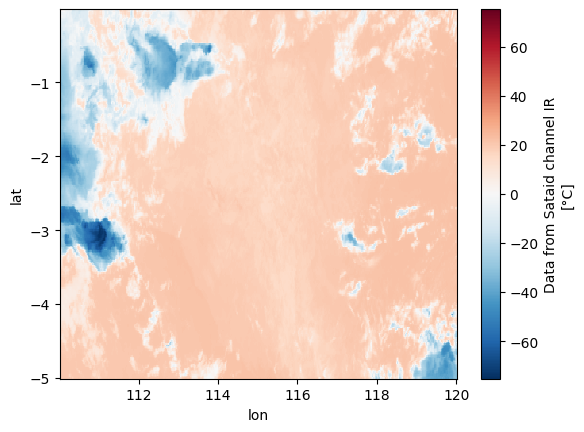

In [39]:
# Access data values
print("\nAccessing data values at a specific point:")
print(xr_data.sel(lat=-10, lon=108, method='nearest'))

# Calculate the mean value
print("\nMean value of the data:")
print(xr_data.mean())

# Select a subset of the data using slicing
print("\nSubset of data using slicing:")
# Adjust the slice to select a valid range
subset_data = xr_data.sel(lat=slice(-5, 0), lon=slice(110, 120))
print(subset_data)

# Plot the xarray DataArray (requires matplotlib)
print("\nPlotting the xarray DataArray:")
subset_data.plot()


Creating a histogram of data values:


(array([   3564.,   60815.,  154124.,  233120.,  321021.,  404149.,
         577215.,  857343., 3082487.,  306162.]),
 array([-89.83118286, -77.12541809, -64.41965332, -51.71388855,
        -39.00812378, -26.30235901, -13.59659424,  -0.89082947,
         11.8149353 ,  24.52070007,  37.22646484]),
 <BarContainer object of 10 artists>)

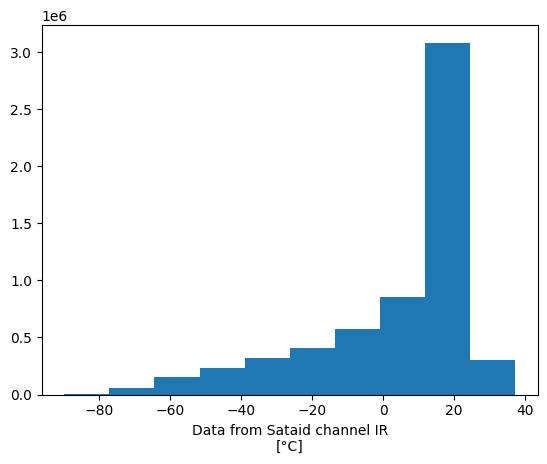

In [36]:
# Example: Creating a histogram of the data values
print("\nCreating a histogram of data values:")
xr_data.plot.hist()